In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_monday = pd.read_csv('./data/monday.csv', sep=';', parse_dates=['timestamp'])
df_monday

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
...,...,...,...
4879,2019-09-02 21:49:00,1442,checkout
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [3]:
df_monday['timestamp']

0      2019-09-02 07:03:00
1      2019-09-02 07:03:00
2      2019-09-02 07:04:00
3      2019-09-02 07:04:00
4      2019-09-02 07:04:00
               ...        
4879   2019-09-02 21:49:00
4880   2019-09-02 21:49:00
4881   2019-09-02 21:49:00
4882   2019-09-02 21:50:00
4883   2019-09-02 21:50:00
Name: timestamp, Length: 4884, dtype: datetime64[ns]

In [4]:
#Calculate the total number of customers in each section
df_monday['location'].value_counts()

checkout    1437
fruit       1005
dairy        895
drinks       797
spices       750
Name: location, dtype: int64

In [5]:
#Calculate the total number of customers in each section over time
df_unstack = df_monday.groupby('timestamp')['location'].value_counts().unstack().fillna(0)
df_unstack

location,checkout,dairy,drinks,fruit,spices
timestamp,,,,,
2019-09-02 07:03:00,0.0,2.0,0.0,0.0,0.0
2019-09-02 07:04:00,0.0,2.0,0.0,1.0,3.0
2019-09-02 07:05:00,2.0,1.0,1.0,0.0,0.0
2019-09-02 07:06:00,2.0,2.0,1.0,2.0,1.0
2019-09-02 07:07:00,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...
2019-09-02 21:46:00,1.0,0.0,2.0,1.0,2.0
2019-09-02 21:47:00,2.0,2.0,0.0,2.0,0.0
2019-09-02 21:48:00,2.0,2.0,2.0,0.0,1.0


<AxesSubplot:xlabel='timestamp'>

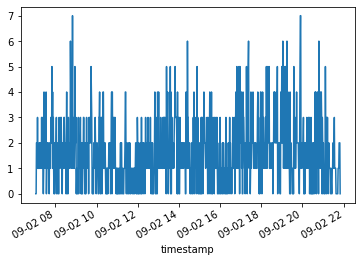

In [6]:
#Display the number of customers at checkout over time
df_unstack['checkout'].plot()

### Calculate the time each customer spent in the market

In [7]:
df_sorted = df_monday.sort_values(by=['customer_no','timestamp'])
df_sorted

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
8,2019-09-02 07:05:00,1,checkout
1,2019-09-02 07:03:00,2,dairy
12,2019-09-02 07:06:00,2,checkout
2,2019-09-02 07:04:00,3,dairy
...,...,...,...
4874,2019-09-02 21:48:00,1444,spices
4880,2019-09-02 21:49:00,1444,checkout
4881,2019-09-02 21:49:00,1445,dairy
4882,2019-09-02 21:50:00,1446,dairy


In [8]:
df_sorted['time_diff'] = df_sorted.groupby('customer_no')['timestamp'].diff()
df_sorted

,timestamp,customer_no,location,time_diff
0,2019-09-02 07:03:00,1,dairy,NaT
8,2019-09-02 07:05:00,1,checkout,0 days 00:02:00
1,2019-09-02 07:03:00,2,dairy,NaT
12,2019-09-02 07:06:00,2,checkout,0 days 00:03:00
2,2019-09-02 07:04:00,3,dairy,NaT
...,...,...,...,...
4874,2019-09-02 21:48:00,1444,spices,NaT
4880,2019-09-02 21:49:00,1444,checkout,0 days 00:01:00
4881,2019-09-02 21:49:00,1445,dairy,NaT
4882,2019-09-02 21:50:00,1446,dairy,NaT


In [9]:
df_resampled = df_sorted.set_index(['timestamp'])
df_resampled

,customer_no,location,time_diff
timestamp,,,
2019-09-02 07:03:00,1,dairy,NaT
2019-09-02 07:05:00,1,checkout,0 days 00:02:00
2019-09-02 07:03:00,2,dairy,NaT
2019-09-02 07:06:00,2,checkout,0 days 00:03:00
2019-09-02 07:04:00,3,dairy,NaT
...,...,...,...
2019-09-02 21:48:00,1444,spices,NaT
2019-09-02 21:49:00,1444,checkout,0 days 00:01:00
2019-09-02 21:49:00,1445,dairy,NaT


In [10]:
df_resampled = df_resampled.groupby('customer_no').resample('T').ffill()
df_resampled

customer_no  location       time_diff
customer_no timestamp                                                 
1           2019-09-02 07:03:00            1     dairy             NaT
            2019-09-02 07:04:00            1     dairy             NaT
            2019-09-02 07:05:00            1  checkout 0 days 00:02:00
2           2019-09-02 07:03:00            2     dairy             NaT
            2019-09-02 07:04:00            2     dairy             NaT
...                                      ...       ...             ...
1444        2019-09-02 21:48:00         1444    spices             NaT
            2019-09-02 21:49:00         1444  checkout 0 days 00:01:00
1445        2019-09-02 21:49:00         1445     dairy             NaT
1446        2019-09-02 21:50:00         1446     dairy             NaT
1447        2019-09-02 21:50:00         1447     fruit             NaT

[10765 rows x 3 columns]

In [11]:
df_resampled.drop(columns='customer_no', inplace=True)

In [12]:
df_resampled.reset_index(inplace=True)

In [13]:
df_resampled['total_spend_time']=df_resampled['time_diff'].dt.seconds

In [14]:
df_resampled['first'] = df_resampled['time_diff'].isna()
df_resampled.loc[~df_sorted['first']]['location'].value_counts(normalize=True)

KeyError: 'first'

In [15]:
df_resampled['next_section'] = df_resampled.groupby('customer_no')['location'].shift(-1)
df_resampled['next_section'].fillna(value='checkout', inplace=True)
df_resampled.loc[df_resampled['customer_no']==18]

,customer_no,timestamp,location,time_diff,total_spend_time,first,next_section
114,18,2019-09-02 07:12:00,fruit,NaT,NaN,True,fruit
115,18,2019-09-02 07:13:00,fruit,NaT,NaN,True,dairy
116,18,2019-09-02 07:14:00,dairy,0 days 00:02:00,120.0,False,dairy
117,18,2019-09-02 07:15:00,dairy,0 days 00:02:00,120.0,False,dairy
118,18,2019-09-02 07:16:00,dairy,0 days 00:02:00,120.0,False,checkout
119,18,2019-09-02 07:17:00,checkout,0 days 00:03:00,180.0,False,checkout


In [16]:
transition_matrix = pd.crosstab(df_resampled['location'], df_resampled['next_section'], normalize='index')
transition_matrix

next_section,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.089843,0.743920,0.062375,0.051502,0.052361
drinks,0.208109,0.011236,0.610650,0.090865,0.079140
fruit,0.206411,0.087959,0.050821,0.607115,0.047694
spices,0.145765,0.191368,0.176710,0.096906,0.389251


In [19]:
transition_matrix.to_csv('transition_matrix.csv')

In [17]:
transition_matrix.columns

Index(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], dtype='object', name='next_section')

In [27]:
import pygraphviz as pgv

sections = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']

# init the graph
G = pgv.AGraph(strict=False,directed=True)

# loop over all pairs of states
for state_from in sections:
    for state_to in sections:
        # get the transition probability
        proba = transition_matrix.loc[state_from, state_to]
        # draw into the graph if the probability is larger zero
        if proba > 0:
            G.add_edge(state_from, state_to, label=np.round(proba, 2))

# write the graph to hard drive            
G.draw('transition.png', prog='dot')